In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Make charts appear inside the notebook
%matplotlib inline

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [2]:
# Download Bitcoin and Ethereum daily data from Yahoo Finance
btc = yf.download("BTC-USD", start="2023-01-01", end="2024-01-01")
eth = yf.download("ETH-USD", start="2023-01-01", end="2024-01-01")

# Display first few rows to verify
print("Bitcoin data:")
display(btc.head())

print("Ethereum data:")
display(eth.head())


C:\Users\akash\AppData\Local\Temp/ipykernel_17076/2874430407.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
C:\Users\akash\AppData\Local\Temp/ipykernel_17076/2874430407.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eth = yf.download("ETH-USD", start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

Bitcoin data:


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2023-01-01,16625.080078,16630.439453,16521.234375,16547.914062,9244361700
2023-01-02,16688.470703,16759.343750,16572.228516,16625.509766,12097775227
2023-01-03,16679.857422,16760.447266,16622.371094,16688.847656,13903079207
2023-01-04,16863.238281,16964.585938,16667.763672,16680.205078,18421743322
2023-01-05,16836.736328,16884.021484,16790.283203,16863.472656,13692758566


Ethereum data:


Price,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,
2023-01-01,1200.964844,1203.475342,1192.885376,1196.713623,2399674550
2023-01-02,1214.656616,1219.860596,1195.214966,1201.103271,3765758498
2023-01-03,1214.778809,1219.095337,1207.491577,1214.744019,3392972131
2023-01-04,1256.526611,1264.807495,1213.168823,1214.718628,6404416893
2023-01-05,1250.438599,1258.571533,1245.173096,1256.484619,4001786456


In [3]:
# Check for missing values
print("BTC missing values:\n", btc.isnull().sum())
print("\nETH missing values:\n", eth.isnull().sum())

# Drop rows with missing values
btc.dropna(inplace=True)
eth.dropna(inplace=True)

# Reset index and rename columns
btc.reset_index(inplace=True)
eth.reset_index(inplace=True)

print("✅ Data cleaned successfully!")


BTC missing values:
 Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

ETH missing values:
 Price   Ticker 
Close   ETH-USD    0
High    ETH-USD    0
Low     ETH-USD    0
Open    ETH-USD    0
Volume  ETH-USD    0
dtype: int64
✅ Data cleaned successfully!


In [4]:
# Calculate daily return (%)
btc['Daily_Return_%'] = btc['Close'].pct_change() * 100
eth['Daily_Return_%'] = eth['Close'].pct_change() * 100

# Calculate 7-day moving average
btc['7D_MA'] = btc['Close'].rolling(window=7).mean()
eth['7D_MA'] = eth['Close'].rolling(window=7).mean()

# Drop initial NaN values from moving average
btc.dropna(inplace=True)
eth.dropna(inplace=True)

print("✅ KPIs calculated (Daily Return %, 7D Moving Average)")


✅ KPIs calculated (Daily Return %, 7D Moving Average)


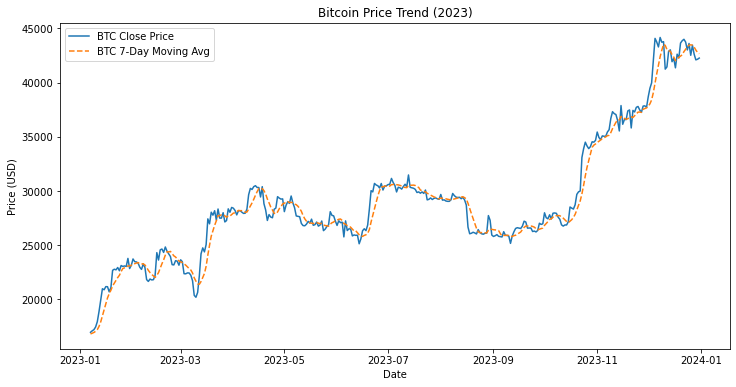

In [5]:
plt.figure(figsize=(12,6))
plt.plot(btc['Date'], btc['Close'], label='BTC Close Price')
plt.plot(btc['Date'], btc['7D_MA'], label='BTC 7-Day Moving Avg', linestyle='--')
plt.title('Bitcoin Price Trend (2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


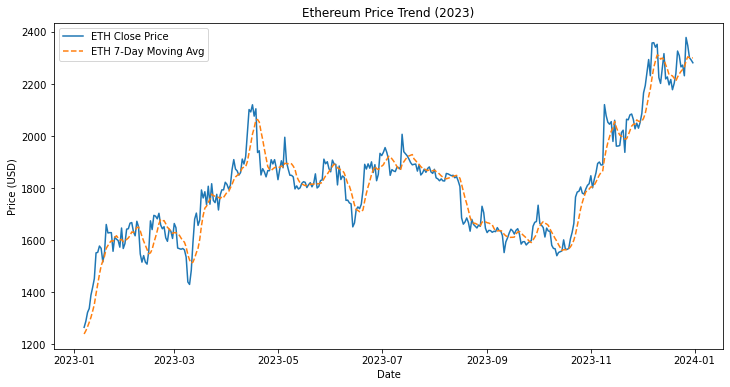

In [6]:
plt.figure(figsize=(12,6))
plt.plot(eth['Date'], eth['Close'], label='ETH Close Price')
plt.plot(eth['Date'], eth['7D_MA'], label='ETH 7-Day Moving Avg', linestyle='--')
plt.title('Ethereum Price Trend (2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [7]:
print("BTC Average Daily Return: ", round(btc['Daily_Return_%'].mean(), 2), "%")
print("BTC Volatility (Std Dev): ", round(btc['Daily_Return_%'].std(), 2), "%")

print("\nETH Average Daily Return: ", round(eth['Daily_Return_%'].mean(), 2), "%")
print("ETH Volatility (Std Dev): ", round(eth['Daily_Return_%'].std(), 2), "%")


BTC Average Daily Return:  0.28 %
BTC Volatility (Std Dev):  2.31 %

ETH Average Daily Return:  0.19 %
ETH Volatility (Std Dev):  2.46 %
